# 3D Printer DataSet for Mechanical Engineers

Import Data

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [77]:
df = pd.read_csv("data.csv")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


Let's multiply these columns by 100 to make them more understandable.

In [79]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [80]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,2.0,8,90,grid,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,honeycomb,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,grid,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,honeycomb,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,grid,250,80,40,abs,100,92,5,70.0


In this data set, ABS and PLA assigned 0 and 1 values for materials.

In [81]:
df.material = [0 if each == "abs" else 1 for each in df.material]
# ABS = 0, PLA = 1

df.infill_pattern = [0 if each == "grid" else 1 for each in df.infill_pattern]
# grid = 0, honeycomb = 1

## Unique values

In [82]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))

layer_height: [ 2.  6. 10. 15. 20.]
wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]
infill_density: [90 80 70 40 10 20 50 30 60]
infill_pattern: [0 1]
nozzle_temperature: [220 225 230 240 250 200 205 210 215]
bed_temperature: [60 65 70 75 80]
print_speed: [ 40  60 120]
material: [0 1]
fan_speed: [  0  25  50  75 100]
roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]
tension_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]
elongation: [120. 140.  80.  50.  70. 110. 130. 150. 170. 240. 100. 220. 190. 160.
 210. 200.  90.  40. 180. 290.  60. 280. 230. 330. 310. 270. 320.]


## Correlation matrix

<AxesSubplot:>

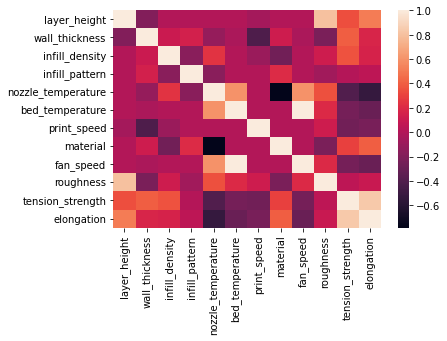

In [83]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

Seperate Input parameters and Prediction Materials.

In [84]:
target_cols = ['roughness', 'tension_strength', 'elongation']
y = df[target_cols].values
x = df.drop(target_cols,axis=1).values

### Some pairplots

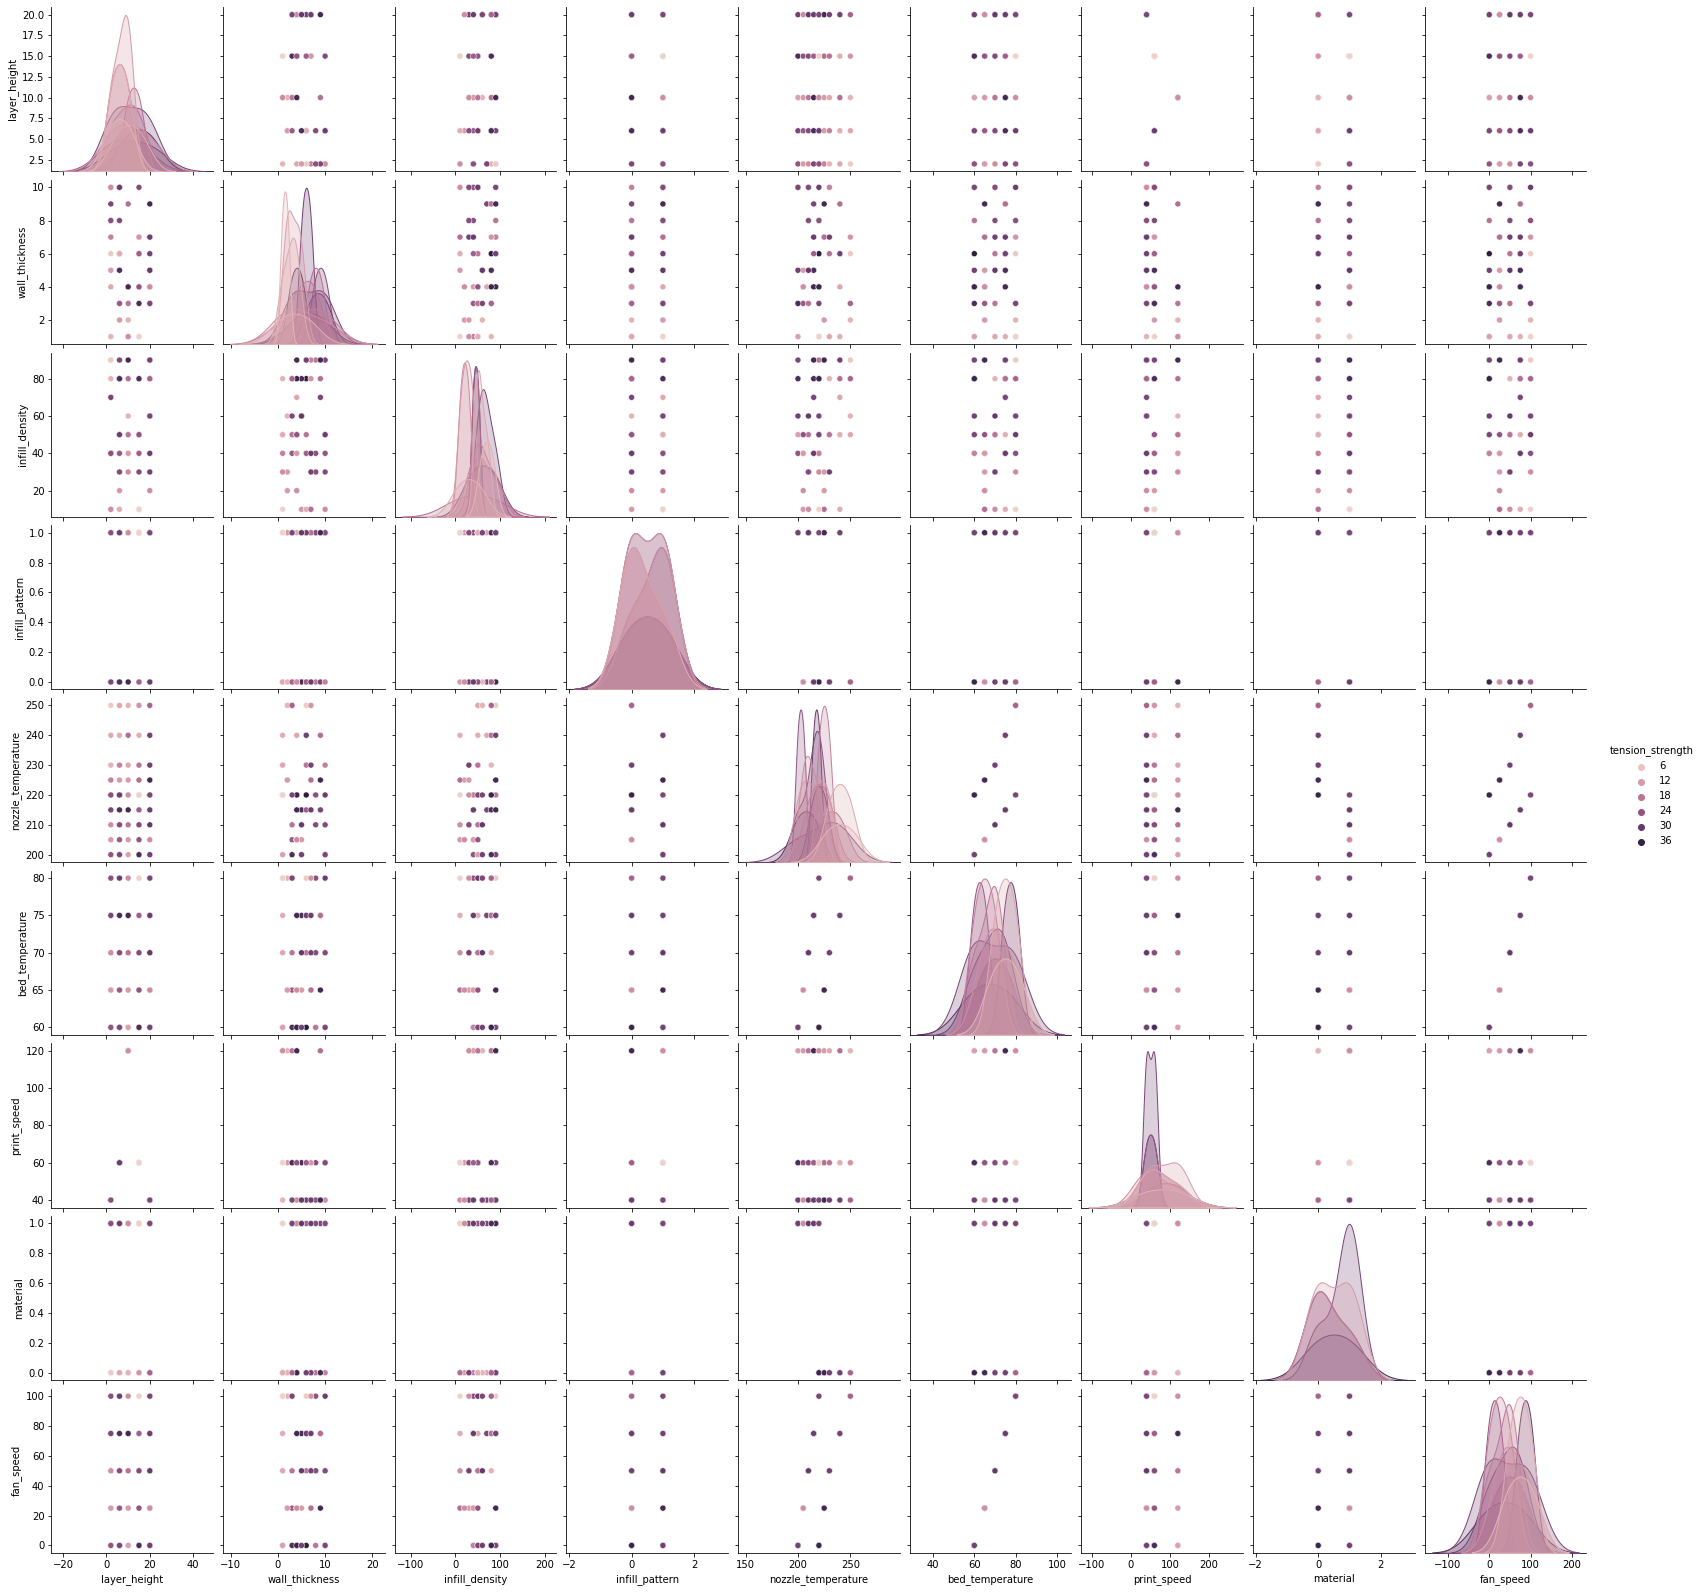

In [63]:
sns.pairplot(df, vars=df.columns[range(9)], hue='tension_strength')

<AxesSubplot:xlabel='fan_speed', ylabel='tension_strength'>

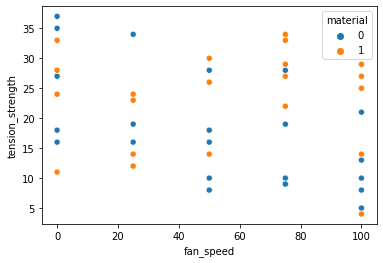

In [85]:
sns.scatterplot(x=df.fan_speed,y=df.tension_strength,hue=df.material)

<AxesSubplot:xlabel='layer_height', ylabel='roughness'>

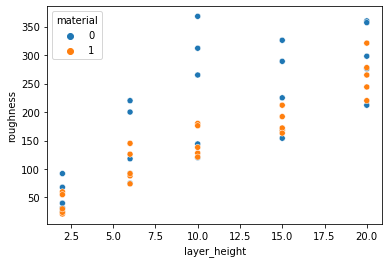

In [86]:
sns.scatterplot(x=df.layer_height,y=df.roughness,hue=df.material)

<AxesSubplot:xlabel='infill_pattern', ylabel='elongation'>

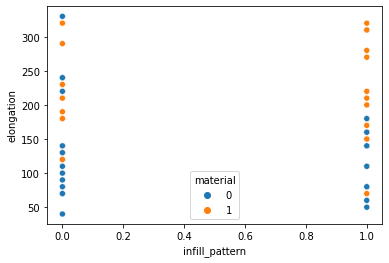

In [87]:
sns.scatterplot(x=df.infill_pattern,y=df.elongation,hue=df.material)

<AxesSubplot:xlabel='nozzle_temperature', ylabel='roughness'>

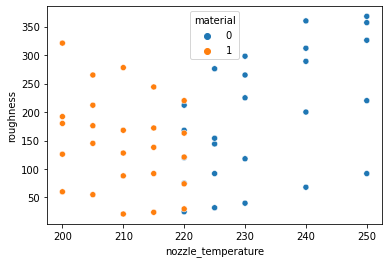

In [151]:
sns.scatterplot(x=df.nozzle_temperature,y=df.roughness,hue=df.material)

### Data split

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Gradient Boosting

In [149]:
params = {
    'n_estimators':200,
    'max_depth':3,
    'learning_rate':0.01,
    'random_state':42,
}
GBR = GradientBoostingRegressor(**params)

MGBR = MultiOutputRegressor(GBR).fit(X_train, Y_train)
MGBR_pred = MGBR.predict(X_test)
print(MGBR_pred)
print(Y_test)
print(f'\nMSE: {mean_squared_error(Y_test, MGBR_pred)}')

[[117.25559161  14.59118336 134.44016522]
 [170.7692826   13.99124115 187.0495656 ]
 [171.20151509  21.8360632  195.60470827]
 [235.8264194   28.64227633 253.47845061]
 [107.14516083  23.62579629 169.90521364]]
[[200.   9.  80.]
 [163.   4.  70.]
 [168.  27. 240.]
 [321.  28. 270.]
 [ 88.  26. 160.]]

MSE: 2247.2317065542784


## Random Forest

In [150]:
params = {'n_estimators':200,
          'max_depth':4,
          'random_state': 42,
          }
RFR = RandomForestRegressor(**params).fit(X_train,Y_train)
RFR_pred = RFR.predict(X_test)
print(RFR_pred)
print(Y_test)
print(f'\nMSE: {mean_squared_error(Y_test, RFR_pred)}')

[[166.67377251  13.96579962 117.41257506]
 [170.76925158  20.82638155 190.41157392]
 [178.31652396  21.86170753 196.3492006 ]
 [246.45305754  29.84160317 301.8910119 ]
 [120.80617221  22.83838075 183.43519377]]
[[200.   9.  80.]
 [163.   4.  70.]
 [168.  27. 240.]
 [321.  28. 270.]
 [ 88.  26. 160.]]

MSE: 1841.9187835999248


## Linear regression

In [153]:
linreg = LinearRegression() 
Mlinreg = MultiOutputRegressor(linreg).fit(X_train, Y_train)
Mlinreg_pred = Mlinreg.predict(X_test)
print(Mlinreg_pred)
print(Y_test)
print(f'\nMSE: {mean_squared_error(Y_test, Mlinreg_pred)}')

[[156.86071431   4.40686909  31.89823626]
 [180.17920195  15.52543925 194.02608082]
 [212.09296118  20.71411962 185.65829439]
 [250.41774781  29.97393313 283.8449672 ]
 [ 88.19982207  19.26883543 161.02886   ]]
[[200.   9.  80.]
 [163.   4.  70.]
 [168.  27. 240.]
 [321.  28. 270.]
 [ 88.  26. 160.]]

MSE: 2011.12448990907


## Keras model !import problems!

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Input(9),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1024),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.38),    
tf.keras.layers.PReLU(),   
tf.keras.layers.Dense(256),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.35),
tf.keras.layers.PReLU(),    
tf.keras.layers.Dense(3, activation="sigmoid")
])

model.compile(tf.optimizers.Adam(lr = 1e-3),loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
for n, (tr, te) in enumerate(KFold(n_splits=5, shuffle=True).split(x)):
    print(f'Fold {n+1}')
    history = model.fit(x[tr],y.astype(float)[tr],
                validation_data=(x[te], y.astype(float)[te]),
                epochs=45, batch_size=8, verbose=2)
    print('')

In [ ]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)